In [162]:
### 24 April 2025
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



WCSS (inertia), which is the sum of the squared distances of each data point to its assigned cluster's centroid.


Point A: (1, 1)
Point B: (1.5, 1.5)
Point C: (5, 5)
Point D: (5.5, 5.5)





Calculating WCSS for Different Values of k:

k = 1 (One Cluster):

The centroid of all points would be the average: Centroid = ((1+1.5+5+5.5)/4, (1+1.5+5+5.5)/4) = (3.25, 3.25)
Now, we calculate the squared Euclidean distance of each point to this centroid:
Distance(A, Centroid)2 = ((1−3.25)2 +(1−3.25)2) = 2×(−2.25)2 = 2×5.0625 = 10.125
Distance(B, Centroid)2 = ((1.5−3.25)2 +(1.5−3.25)2) = 2×(−1.75)2 = 2×3.0625 = 6.125
Distance(C, Centroid)2 = ((5−3.25)2 +(5−3.25)2) = 2×(1.75)2 = 2×3.0625 = 6.125
Distance(D, Centroid)2 = ((5.5−3.25)2 +(5.5−3.25)2 ) = 2×(2.25)2 = 2×5.0625 = 10.125
WCSS (k=1) = 10.125 + 6.125 + 6.125 + 10.125 = 32.5

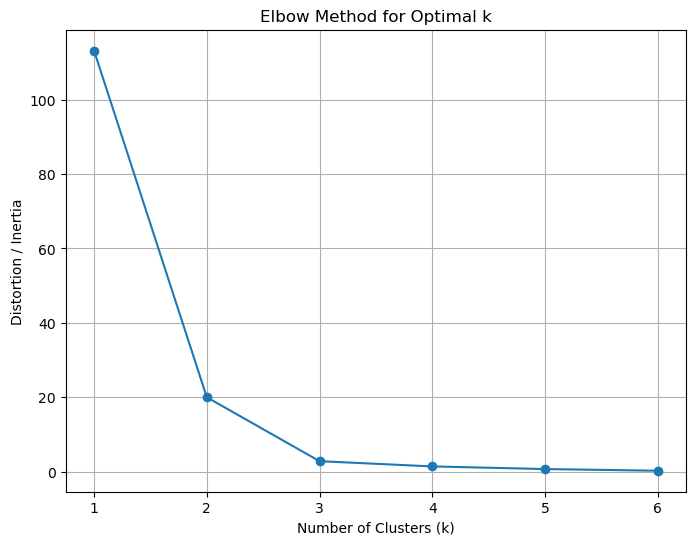

Silhouette Score for k=2: 0.7139
Silhouette Score for k=3: 0.7761
Silhouette Score for k=4: 0.6907
Silhouette Score for k=5: 0.5643
Silhouette Score for k=6: 0.4167


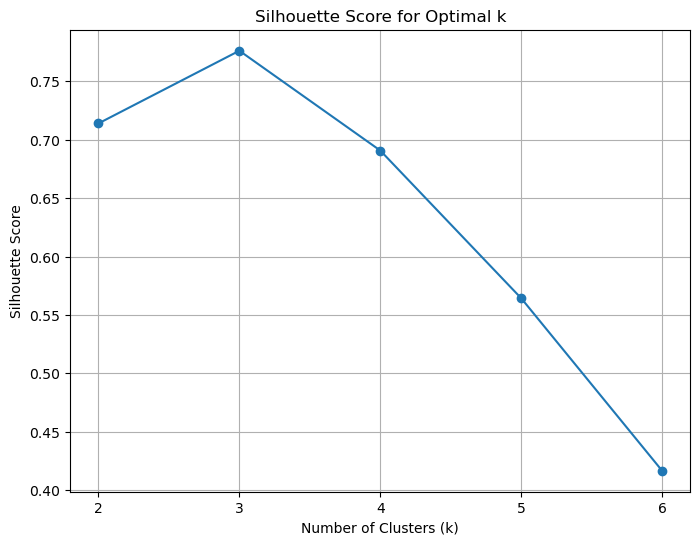


Optimal k value selected using Silhouette Score: 3
[1 1 1 1 1 1 0 0 0] labels
KMeans(n_clusters=2, n_init=10) kmeans


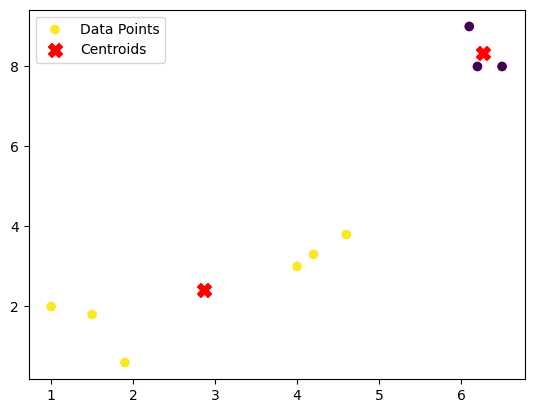

[1 1 1 1 1 1 0 0 0]

Centroids:
[[6.26666667 8.33333333]
 [2.86666667 2.41666667]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

cluster_number = 2
# 1. Generate very simple and small dummy data (6 points, 2 clusters)
data = np.array([[1, 2], [1.5, 1.8], [1.9, 0.6], 
                 [4, 3], [4.2, 3.3], [4.6, 3.8], 
                 [6.2, 8], [6.5, 8], [6.1, 9]
                
                ])





distortions = []
possible_k_values = range(1, 7)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0) # Added random_state for reproducibility
    kmeans.fit(data)
    distortions.append(kmeans.inertia_) 


plt.figure(figsize=(8, 6))
plt.plot(possible_k_values, distortions, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion / Inertia')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()



##########################################
##########################################




silhouette_scores = []
possible_k_values = range(2, 7)  # Silhouette Score requires at least 2 clusters

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.4f}")

# 3. Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

# 4. Identify the optimal k based on the highest Silhouette Score
optimal_k_silhouette = possible_k_values[np.argmax(silhouette_scores)]
print(f"\nOptimal k value selected using Silhouette Score: {optimal_k_silhouette}")
############################
############################

# 2. Initialize and fit the K-Means model
kmeans = KMeans(cluster_number, n_init=10)
kmeans.fit(data)

# 3. Get the cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(labels, 'labels')
print(kmeans, 'kmeans')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, color='red', label='Centroids')
plt.legend()
plt.show()

print(labels)
print("\nCentroids:")
print(centroids)